## Поиск глобального минимума функции $F(x) = A sin(Bx)+C cos(Dx)$


In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output

from ipywidgets import (
    interact,
    FloatSlider,
    FloatRangeSlider,
    Dropdown,
    FloatLogSlider,
    IntSlider,
    Button,
    Checkbox,
  )

widgetConf = {
    "disabled":False,
    "continuous_update":False,
    "orientation":'horizontal',
    "readout":True,
}
rangeConf = {
    "min":-10.0,
    "max":10.0,
    "step":0.1,
    "readout_format":'.1f',
}

funcUI = {
  'A': FloatSlider(**widgetConf, **rangeConf, value=2, description='A:'),
  'B': FloatSlider(**widgetConf, **rangeConf, value=3, description='B:'),
  'C': FloatSlider(**widgetConf, **rangeConf, value=3, description='C:'),
  'D': FloatSlider(**widgetConf, **rangeConf, value=5, description='D:'),
}

X_UI = FloatRangeSlider(
    **widgetConf,
    **rangeConf,
    value=[0, 8],
    description='Диапазон X'
  )

methodUI = {
  'method': Dropdown(
      options=['Стронгин', 'Пиявский', 'Перебор'],
      value='Пиявский',
      description='Метод',
      disabled=False,
  ),
  'r': FloatSlider(
      **widgetConf,
      min=1.0,
      max=50,
      step=0.01,
      value=5,
      description='Надёжность'
    ),
  'mod':  Checkbox(
      value=False,
      description='Адаптивный',
      disabled=False,
      indent=False
    ),
  'eps': FloatLogSlider(
        value=0.001,
        base=10,
        min=-7, # max exponent of base
        max=0, # min exponent of base
        step=0.2, # exponent step
        description='Погрешность'
    ),
  'n': IntSlider(
        **widgetConf,
        value=10,
        min=1,
        max=1000,
        step=1,
        description='n итераций:',
    ),
}

def getF(A, B, C, D):
  from math import sin, cos
  A = A.value
  B = B.value
  C = C.value
  D = D.value
  f = lambda x : A*sin(B*x)+C*cos(D*x)
  return f

In [4]:
import numpy as np

start = Button(description='Начать расчёт', disabled=False)

def ShowUI():
  print('   F(x) = A sin(B x) + C cos(D x)')
  print("Введите коэффициенты A, B, C, D:")

  for v in funcUI.values():
    display(v)

  display(X_UI)

  for v in methodUI.values():
    display(v)

  display(start)

  pass

def Piyavski(f, restr, eps, n, r, mod):
  _x, x_ = restr
  x = np.array([_x, x_])
  new_x = min(_x, x_)

  for i in range(n):
    x = np.sort(x)
    y = np.vectorize(f)(x)

    m = r
    if mod:
      u = np.empty(len(x)-1)
      for j in range(len(x)-1):
        u[j] = abs( y[j+1]-y[j] ) / ( x[j+1]-x[j] )
      m = m * max(u)

    R = np.empty(len(x)-1)
    for j in range(len(x)-1):
      R[j] = m*( x[j+1]-x[j] )/2 - ( y[j+1]+y[j])/2

    t = np.argmax(R)
    new_x = ( x[t+1]+x[t] )/2 - ( y[t+1]-y[t] )/(2*m)
    x = np.append(x, new_x)

    e = abs(-max(R)-min(y))
    if e < eps:
      return (new_x, i, x)

  return (new_x, n, x)

def Strongin(f, restr, eps, n, r, mod):
  _x, x_ = restr
  x = np.array([_x, x_])
  new_x = min(_x, x_)

  for i in range(n):
    x = np.sort(x)
    y = np.vectorize(f)(x)

    m = r
    if mod:
      u = np.empty(len(x)-1)
      for j in range(len(x)-1):
        u[j] = abs( y[j+1]-y[j] ) / ( x[j+1]-x[j] )
      m = m * max(u)

    R = np.empty(len(x)-1)
    for j in range(len(x)-1):
      R[j] = m*( x[j+1]-x[j] ) + ( y[j+1]-y[j] )**2 / (m*( x[j+1]-x[j] )) - 2*(y[j+1]+y[j])

    t = np.argmax(R)
    new_x = ( x[t+1]+x[t] )/2 - ( y[t+1]-y[t] )/(2*m)
    x = np.append(x, new_x)

    e = abs(x[t+1]-x[t])
    if e < eps:
      return (new_x, i, x)

  return (new_x, n, x)

def BruteForce(f, restr, eps, n):
  _x, x_ = restr
  x = np.linspace(_x, x_, n)
  y = np.vectorize(f)(x)
  k = np.argmin(y)

  return (x[k], n, x)

def Go(smth):
  from matplotlib import pyplot as plt
  global funcUI

  f = getF(**funcUI)

  fr = max(funcUI['B'].value, funcUI['D'].value)
  _x, x_ = X_UI.value
  n = int((x_ - _x) * fr * 10)
  xs = np.linspace(_x, x_, n)
  Y = np.vectorize(f)(xs)

  # clear_output(wait = True)
  fig, ax = plt.subplots(figsize=(5, 6))
  ax.plot(xs, Y, color='green')
  # display(fig)


  r = methodUI['r'].value
  eps = methodUI['eps'].value
  n = methodUI['n'].value
  mod = methodUI['mod'].value
  res = None

  if methodUI['method'].value == 'Пиявский':
    res = Piyavski(f, [_x, x_], eps, n, r, mod)
  elif methodUI['method'].value == 'Стронгин':
    res = Strongin(f, [_x, x_], eps, n, r, mod)
  else:
    res = BruteForce(f, [_x, x_], eps, n)

  print('x =', res[0], 'y =', f(res[0]), 'n =', res[1])
  ax.scatter(res[2], len(res[2])*[Y.min()], alpha=0.15)
  pass

start.on_click(Go)

   F(x) = A sin(B x) + C cos(D x)
Введите коэффициенты A, B, C, D:


FloatSlider(value=2.0, continuous_update=False, description='A:', max=10.0, min=-10.0, readout_format='.1f')

FloatSlider(value=3.0, continuous_update=False, description='B:', max=10.0, min=-10.0, readout_format='.1f')

FloatSlider(value=3.0, continuous_update=False, description='C:', max=10.0, min=-10.0, readout_format='.1f')

FloatSlider(value=5.0, continuous_update=False, description='D:', max=10.0, min=-10.0, readout_format='.1f')

FloatRangeSlider(value=(0.0, 8.0), continuous_update=False, description='Диапазон X', max=10.0, min=-10.0, rea…

Dropdown(description='Метод', options=('Стронгин', 'Пиявский', 'Перебор'), value='Стронгин')

FloatSlider(value=26.92, continuous_update=False, description='Надёжность', max=50.0, min=1.0, step=0.01)

Checkbox(value=False, description='Адаптивный', indent=False)

FloatLogSlider(value=0.001, description='Погрешность', max=0.0, min=-7.0, step=0.2)

IntSlider(value=206, continuous_update=False, description='n итераций:', max=1000, min=1)

Button(description='Начать расчёт', style=ButtonStyle())

x = 5.67469492255258 y = -4.9207592810678955 n = 75


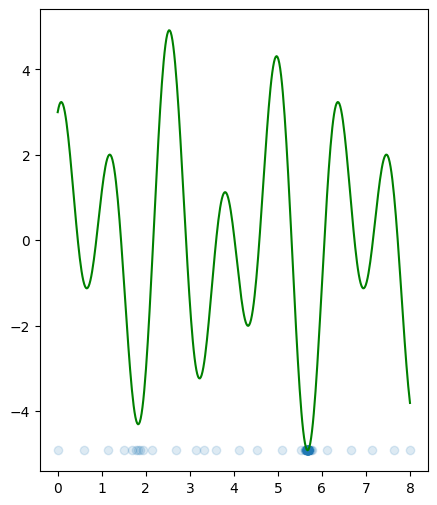

x = 5.67420463325389 y = -4.920735023930036 n = 206


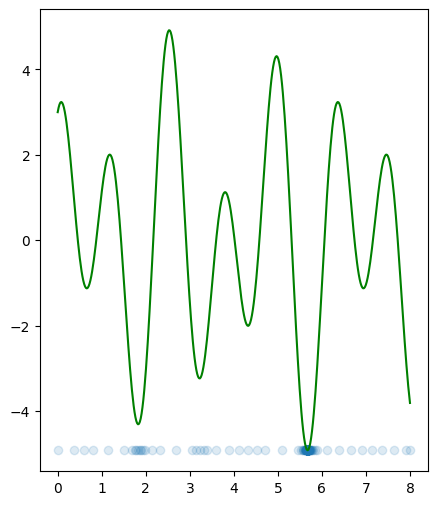

In [11]:
ShowUI()